<a href="https://colab.research.google.com/github/Muhammed-Shaahidh/Heart_Attack_Prediction/blob/master/Heart_Attack_Prediction_G_34.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install missingno matplotlib seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [ ]:
url = "https://raw.githubusercontent.com/Muhammed-Shaahidh/Heart_Attack_Prediction/refs/heads/master/Data/data.csv"
df_base = pd.read_csv('data.csv')
df_base.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28.0,1.0,2.0,130,132,0,2,185,0,0.0,2,0,7,0.0
1,29.0,1.0,2.0,120,243,0,0,160,0,0.0,2,0,7,0.0
2,29.0,1.0,2.0,140,230,0,0,170,0,0.0,2,0,7,0.0
3,30.0,0.0,1.0,170,237,0,1,170,0,0.0,2,0,6,0.0
4,31.0,0.0,2.0,100,219,0,1,150,0,0.0,2,0,7,0.0


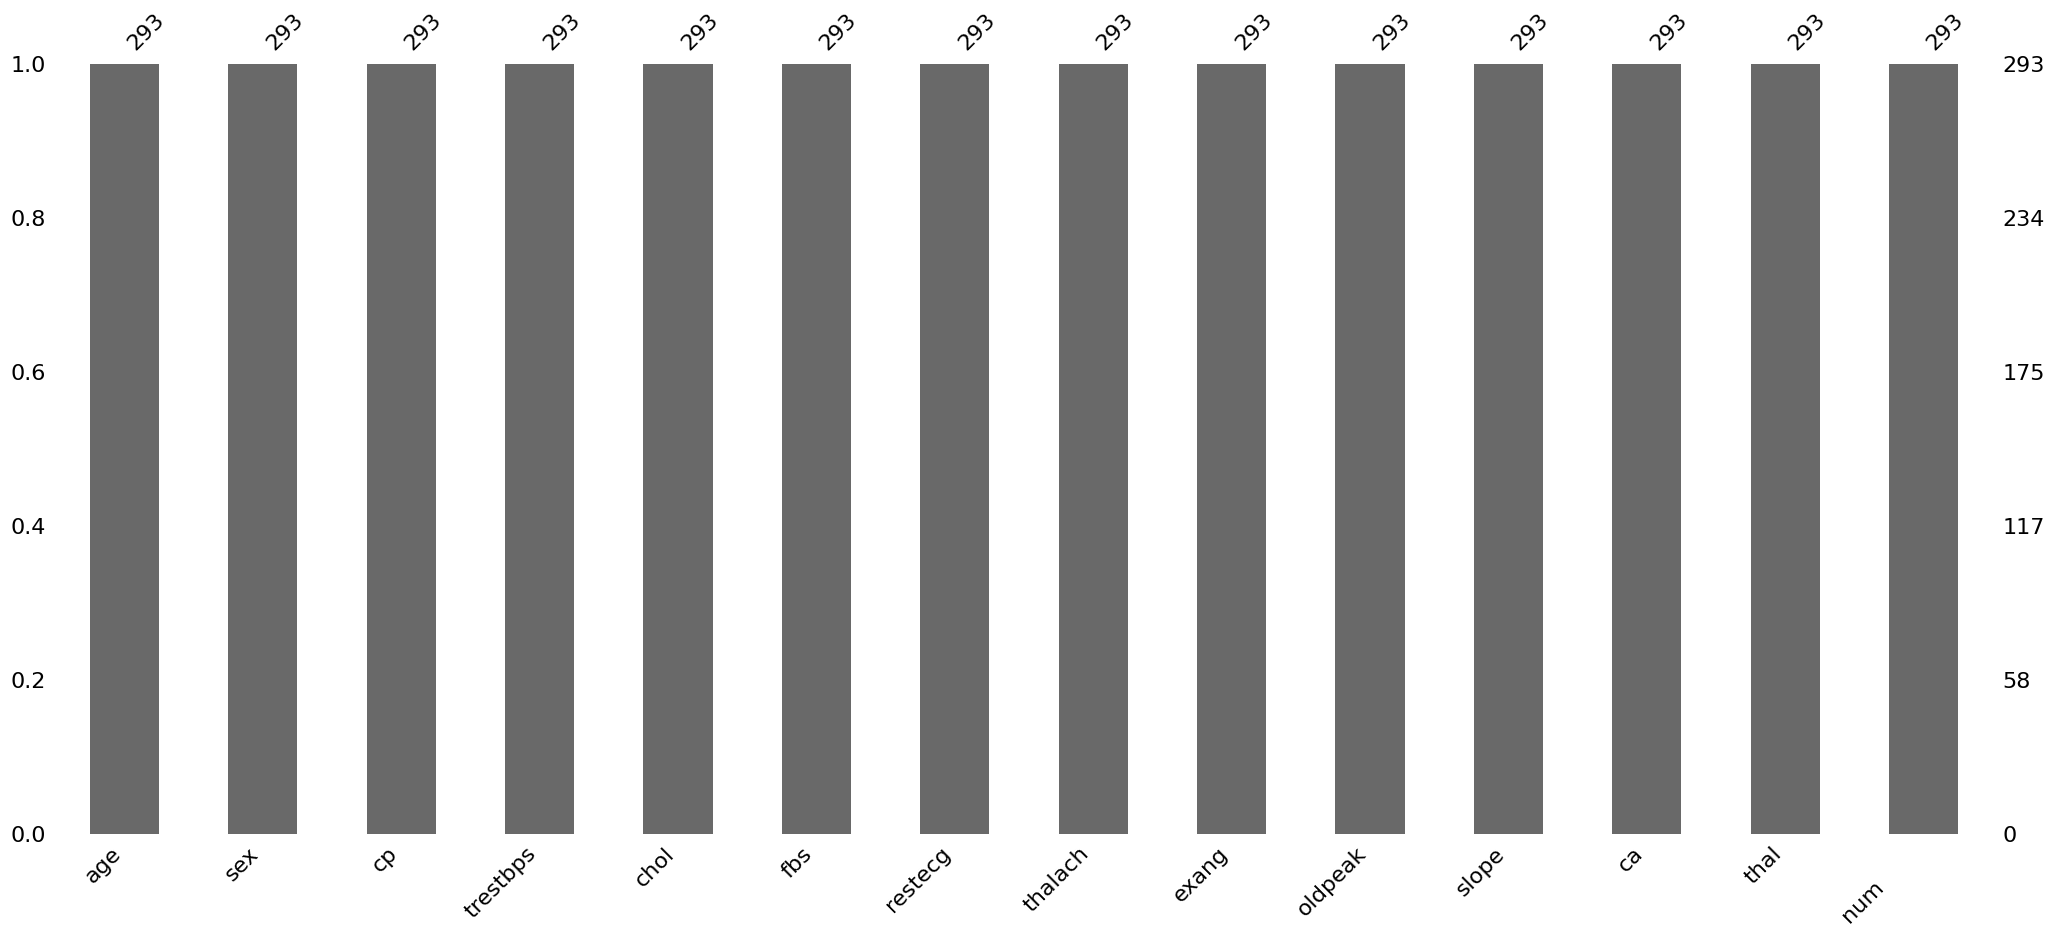

In [ ]:
#Member1 #IT24102908 #Data cleaning(Imputation, Removing Duplicates)


f1 = df_base.replace('?', np.nan)

# Visualize missing values
msno.bar(f1)
plt.show()

# Example imputation
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

for col in f1.columns:
    if f1[col].dtype == 'O':  # categorical
        f1[col] = cat_imputer.fit_transform(f1[[col]]).flatten()
    else:  # numerical
        f1[col] = num_imputer.fit_transform(f1[[col]]).flatten()

# Remove duplicates
f1 = f1.drop_duplicates()

# Save cleaned data
f1.to_csv('data.csv', index=False)

In [ ]:
print(f1.duplicated().sum())

0


In [ ]:
print(f1.isna().sum())

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
num           0
dtype: int64


age: 0 outliers


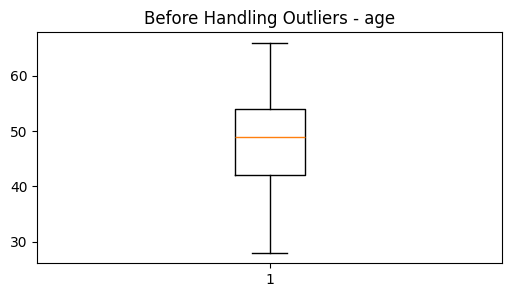

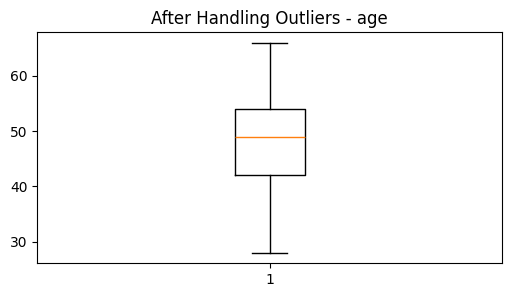

sex: 0 outliers


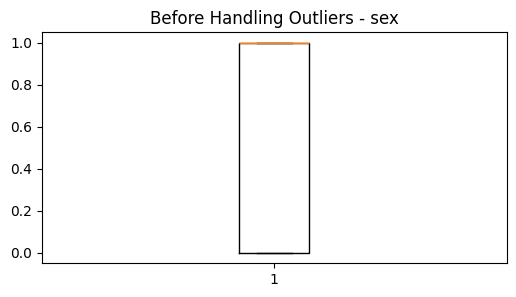

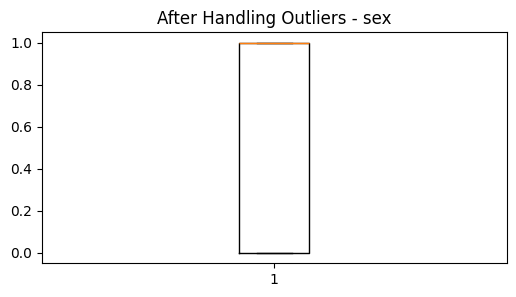

cp: 0 outliers


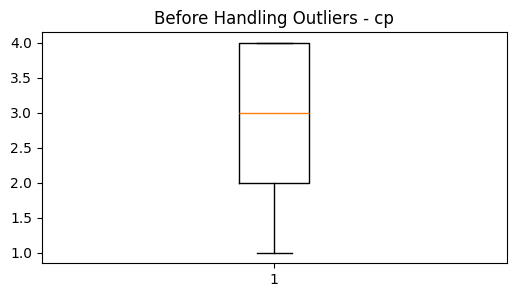

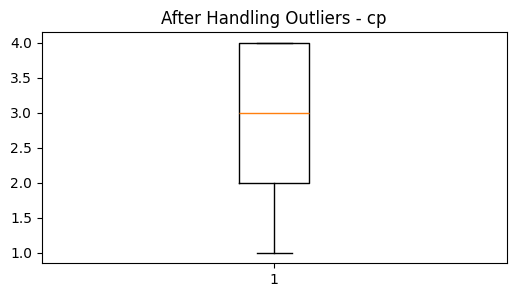

oldpeak: 11 outliers


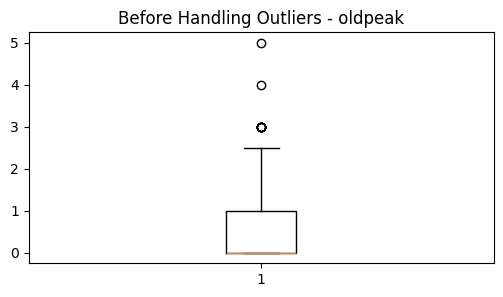

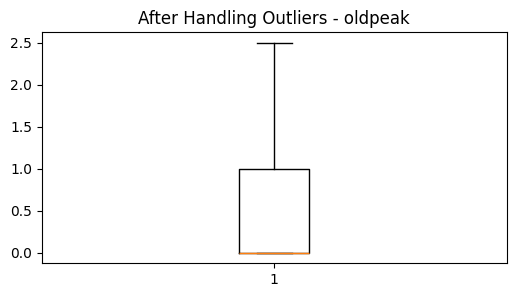

num       : 0 outliers


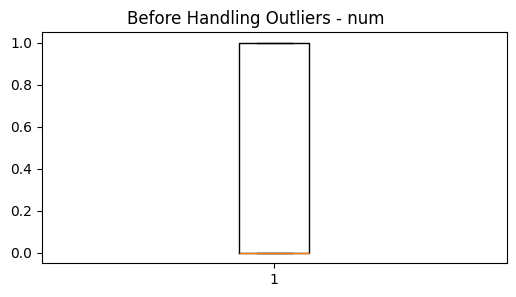

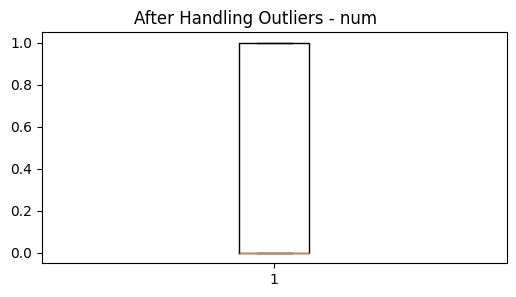

✅ Outlier handling complete. Cleaned file saved as 'data_outliers_handled.csv'


In [ ]:

#Member 2 (IT24102659 Senevirathna K.S.D.B)– Handling Outliers

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load cleaned dataset
f1 = pd.read_csv('data.csv')

# Detect outliers using IQR method
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)]

# Handle outliers by capping (winsorization)
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])
    return df

# Loop through numeric columns
for col in f1.select_dtypes(include=[np.number]).columns:
    outliers = detect_outliers_iqr(f1, col)
    print(f"{col}: {len(outliers)} outliers")

    # Boxplot before handling
    plt.figure(figsize=(6,3))
    plt.title(f"Before Handling Outliers - {col}")
    plt.boxplot(f1[col])
    plt.show()

    # Handle outliers
    f1 = cap_outliers(f1, col)

    # Boxplot after handling
    plt.figure(figsize=(6,3))
    plt.title(f"After Handling Outliers - {col}")
    plt.boxplot(f1[col])
    plt.show()

# Save dataset after outlier handling
f1.to_csv('data_outliers_handled.csv', index=False)

print("✅ Outlier handling complete. Cleaned file saved as 'data_outliers_handled.csv'")


Member 05 - IT24610823 (Shaahidh M.W.M) - Normalizaton/Scaling

In [4]:
df = pd.read_csv('data.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'